In [13]:
try:
    from PIL import Image
    from PIL import ImageDraw
    from PIL import ImageFont
except ImportError:
    import Image
import pytesseract
from pytesseract import Output
import matplotlib.pyplot as plot
import numpy as np
import cv2
import PySimpleGUI as sg
import os.path

In [93]:
# img = cv2.imread('test_3.jpg')
# a = 1.7
# b = 0
# kernel = np.ones((5,5), np.uint8)
# adjusted = cv2.convertScaleAbs(img,alpha=a,beta=b)
# gray = cv2.cvtColor(adjusted,cv2.COLOR_RGB2GRAY)
# ret, filtered = cv2.threshold(gray, 250,255,cv2.THRESH_BINARY)

  

MUJI

Fe EN Be aia

 
   
 

WELCOME TO MUJI
FESTIVAL WALK STORE
TEL: (852)3971-3208

121-07-0000121475
28/Jan/2023 12:13:56
QTY PRICE AMOU

  
   
  
  
  
   
   
 
   

20A Double Clip 6 pes
4550182207859 1 8.0 8.0

4547315187386 weet 7.0% 7.0
TOTAL 2 15.0
OCTOPUS 15.0
CHANGE 0.0
=~ OCTOPUS NO. sgsacdeg Ee

S22 «(DEVICE NO. 516314
~~ REMAINING VALUE 17.4

SS SS Last add value by Cash on 2023-01-14

> PASSPORT ID: xxx xxxx 3249

SS ARE Bhai Pay RL ea) Ca

| BIRIHEDE > SERRA GAG aes

SSS (https: i muji com, hk/zh/taq. a
SS

MUJI Goods Exchange Service shall be subject

to the Terms and Conditions displayed on our

“= in-store notice or official website at
SS pttps://www.muji .com.hk/zh/faq. php

=
SI IANA AA
SS 21°07 0 0 1amieaarmene:



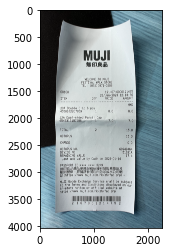

In [12]:
img = cv2.imread('test_2.jpg')
text = pytesseract.image_to_string(img,lang="eng")
print(text)
plot.imshow(img)

In [14]:
img = cv2.imread('test_2.jpg')
shop_list = ['MUJI', 'Wellcome', 'niko and...', 'STARBUCKS','UNIQLO']
text = pytesseract.image_to_string(img,lang="eng")
text_split = text.splitlines()
shop_amount = len(shop_list)

for i in range(0, len(shop_list)):
    finding_shop = shop_list[i]
    for i in range(0, len(text_split)):
        if finding_shop in text_split[i]:
            print("Store:", finding_shop)
            break
    
try:
    for i in range(0, len(text_split)):
        total_found = text_split[i].startswith("TOTAL") | text_split[i].startswith("Total")
        if total_found == True:
            text_total = text_split[i].split()
#             text_total = text_total[1:]
            for i in range(len(text_total)):
#                 text_total[i] = float(text_total[i])
                total = text_total[i]
#             total = max(text_total)
            print("Total:", total)
            break
except:
  print("An exception occurred")

Store: MUJI
Total: 15.0


In [33]:
img = cv2.imread('test_6.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

width_list = []
for c in cnts:
	_, _, w, _ = cv2.boundingRect(c)
	width_list.append(w)
wm = np.median(width_list)

tess_text = pytesseract.image_to_data(img, output_type='dict', lang="eng+chi_tra")
for i in range(len(tess_text['text'])):
	word_len = len(tess_text['text'][i])
	if word_len > 1:
		world_w = int(wm * word_len)
		(x, y, w, h) = (tess_text['left'][i], tess_text['top'][i], tess_text['width'][i], tess_text['height'][i])
		cv2.rectangle(img, (x, y), (x + world_w, y + h), (255, 0, 0), 2)
		im = Image.fromarray(img)
		draw = ImageDraw.Draw(im)
		font = ImageFont.truetype(r'C:\Windows\Fonts\Arial.ttf', size=18, encoding="utf-8")
		draw.text((x, y - 20), tess_text['text'][i], (255, 0, 0), font=font)
		img = cv2.cvtColor(np.array(im), cv2.COLOR_RGB2BGR)

# cv2.imshow("TextBoundingBoxes", img)
# cv2.waitKey(0)

cv2.imwrite('test_6_boxed.jpg', img)

# plot.imshow(img)

True

In [23]:
img = cv2.imread('test_6.jpg')

data = pytesseract.image_to_data(img, output_type='dict')
boxes = len(data['level'])
for i in range(boxes ):
    (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
    #Draw box        
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

In [24]:
cv2.imwrite('test_6_boxed.jpg', img)

True

userful link: https://zhuanlan.zhihu.com/p/448253254